# visualising the data

In [2]:
import tensorflow as tf


In [2]:
import os


In [3]:
bas='C:\\Users\\niteshiit\\Desktop\\Dataset'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [5]:
os.listdir(bas)

['test', 'train']

In [6]:
import numpy as np

In [7]:
import pandas as pd


In [8]:
test_path=bas+'\\test\\'
train_pth=bas+'\\train\\'

In [9]:
test_path


'C:\\Users\\niteshiit\\Desktop\\Dataset\\test\\'

In [10]:
train_pth

'C:\\Users\\niteshiit\\Desktop\\Dataset\\train\\'

In [11]:
os.listdir(test_path)

['without_mask', 'with_mask']

In [12]:
os.listdir(test_path+'with_mask')[5]Let's find out the average dimensions of these images.

'114-with-mask.jpg'

# Let's find out the average dimensions of these images.

In [16]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_pth+'\\without_mask'):
    
    img = imread(train_pth+'\\without_mask'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [17]:
np.mean(dim1)

462.7210365853659

In [18]:
np.mean(dim2)

392.5442073170732

In [19]:
image_shape=(462,392,3)
image_shape[:2]

(462, 392)

# Preparing the Data for the model


# preprocessing

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen=ImageDataGenerator(rotation_range=20,# rotate the image 20 degrees
                            width_shift_range=0.1,# Shift the pic width by a max of 5%
                            height_shift_range=0.1,# Shift the pic height by a max of 5%
                            fill_mode='nearest',# Fill in missing pixels with the nearest filled value
                            shear_range=0.1,# Shear means cutting away part of the image (max 10%)
                            zoom_range=0.1, # Zoom in by 10% max
                             horizontal_flip=True,# Allow horizontal flipping
                             rescale=1/255 # Rescale the image by normalzing it.
                               
                            )

In [22]:
image_gen.flow_from_directory(train_pth)

Found 1314 images belonging to 2 classes.


In [23]:
image_gen.flow_from_directory(test_path)

Found 194 images belonging to 2 classes.


# creating model

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [26]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])





In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [29]:
batch_size=16

In [30]:
train_img_gen=image_gen.flow_from_directory(train_pth,
                                           target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 1314 images belonging to 2 classes.


In [31]:
test_img_gen=image_gen.flow_from_directory(test_path,
                                           target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           class_mode='binary',
                                          shuffle=False)

Found 194 images belonging to 2 classes.


In [32]:
train_img_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [33]:
result=model.fit_generator(train_img_gen,epochs=25,
                          validation_data=test_img_gen,
                          callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
83/83 [==============================] - 249s 3s/step - loss: 0.7242 - accuracy: 0.7519 - val_loss: 0.2548 - val_accuracy: 0.8814
Epoch 2/25
83/83 [==============================] - 257s 3s/step - loss: 0.2736 - accuracy: 0.9056 - val_loss: 0.1780 - val_accuracy: 0.9227
Epoch 3/25
83/83 [==============================] - 258s 3s/step - loss: 0.2378 - accuracy: 0.9277 - val_loss: 0.3281 - val_accuracy: 0.9124
Epoch 4/25
83/83 [==============================] - 236s 3s/step - loss: 0.2302 - accuracy: 0.9193 - val_loss: 0.1457 - val_accuracy: 0.9485
Epoch 5/25
83/83 [==============================] - 237s 3s/step - loss: 0.1896 - accuracy: 0.9307 - val_loss: 0.1239 - val_accuracy: 0.9433
Epoch 6/25
83/83 [==============================] - 238s 3s/step - loss: 0.1703 - accuracy: 0.9399 - val_loss: 0.1604 - val_accuracy: 0.9381
Epoch 7/25
83/83 [==============================] - 246s 3s/step - loss: 0.178

In [34]:
model.history.history

{'loss': [0.7241977453231812,
  0.27356240153312683,
  0.23784011602401733,
  0.23018386960029602,
  0.18959233164787292,
  0.17031750082969666,
  0.1787652224302292,
  0.12689447402954102,
  0.12534500658512115,
  0.19502371549606323,
  0.14406272768974304],
 'accuracy': [0.7519025802612305,
  0.9056316614151001,
  0.9277016520500183,
  0.9193302989006042,
  0.9307458400726318,
  0.9398782253265381,
  0.935312032699585,
  0.9535768628120422,
  0.9520547986030579,
  0.9375951290130615,
  0.9490106701850891],
 'val_loss': [0.25480714440345764,
  0.17799027264118195,
  0.32809752225875854,
  0.14568640291690826,
  0.1239442229270935,
  0.1603897213935852,
  0.09692554920911789,
  0.1974007487297058,
  0.08613751828670502,
  0.11874787509441376,
  0.14145883917808533],
 'val_accuracy': [0.8814433217048645,
  0.9226804375648499,
  0.9123711585998535,
  0.9484536051750183,
  0.9432989954948425,
  0.938144326210022,
  0.969072163105011,
  0.938144326210022,
  0.969072163105011,
  0.979381442

In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

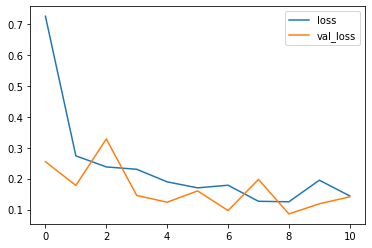

In [36]:
losses[['loss','val_loss']].plot()

# Evaluating the data for test set

In [37]:
model.evaluate_generator(test_img_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.1190536841750145, 0.9536082744598389]

In [38]:
model.metrics_names


['loss', 'accuracy']

In [39]:
pred=model.predict_generator(test_img_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [40]:
pred


array([[1.04671717e-03],
       [1.83838606e-02],
       [1.59075856e-03],
       [6.62410021e-01],
       [1.71512365e-03],
       [6.65426254e-04],
       [2.94028578e-05],
       [2.17288733e-04],
       [5.31439673e-06],
       [1.20853183e-04],
       [6.95172846e-02],
       [2.45612546e-06],
       [9.67890024e-04],
       [3.21063399e-03],
       [1.04754110e-06],
       [1.81406736e-04],
       [2.22282648e-01],
       [3.15495054e-05],
       [1.29587948e-02],
       [2.53468752e-04],
       [1.12688707e-04],
       [6.02453947e-04],
       [3.52589488e-02],
       [6.29162784e-08],
       [5.17153740e-03],
       [4.05043364e-04],
       [5.90440631e-03],
       [9.31900577e-05],
       [1.80189509e-05],
       [2.92541836e-06],
       [1.40313208e-02],
       [3.20658386e-02],
       [9.47717905e-01],
       [7.20232725e-04],
       [1.77603960e-03],
       [6.18401900e-05],
       [2.34210491e-03],
       [7.21338391e-03],
       [2.43149361e-06],
       [1.20490906e-04],


In [41]:
prediction=pred>0.5

In [42]:
prediction


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [43]:
len(pred
   )

194

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# pridiction of model on random 2 images 

# if pred>0.5-->true--->not wear mask   else wear  mask

# 0 index---->with mask   1:- without mask

In [45]:
img1=test_path+'with_mask\\'+'114-with-mask.jpg'

In [46]:
img1


'C:\\Users\\niteshiit\\Desktop\\Dataset\\test\\with_mask\\114-with-mask.jpg'

In [47]:
from tensorflow.keras.preprocessing import image

In [48]:
my_image=image.load_img(img1,target_size=image_shape)

In [49]:
my_img_array=image.img_to_array(my_image)

In [50]:
my_img_array.shape

(462, 392, 3)

In [51]:
my_img_array=np.expand_dims(my_img_array,axis=0)

In [52]:
my_img_array.shape

(1, 462, 392, 3)

In [53]:
pred=model.predict(my_img_array)>0.5

In [54]:
if pred==True:
    print(" NOt wear marks")
else:
    print("wear mask")

wear mask


In [55]:
model.predict(my_img_array)


array([[0.]], dtype=float32)

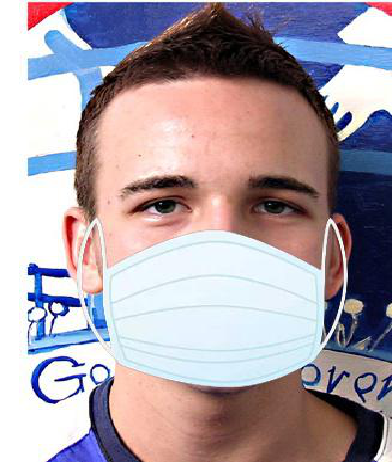

In [56]:
image.load_img(img1,target_size=image_shape)

In [57]:
img2=test_path+'without_mask\\'+'122.jpg'

In [58]:
img2

'C:\\Users\\niteshiit\\Desktop\\Dataset\\test\\without_mask\\122.jpg'

In [59]:
my_image2=image.load_img(img2,target_size=image_shape)

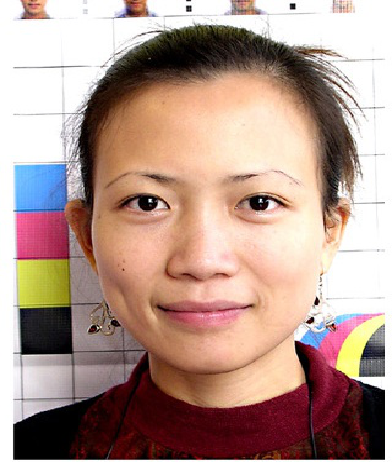

In [60]:
my_image2

In [61]:
my_img_array2=image.img_to_array(my_image2)

In [62]:
my_img_array2=np.expand_dims(my_img_array2,axis=0)

In [63]:
pred2=model.predict(my_img_array2)>0.5

In [64]:
pred2

array([[ True]])

In [65]:
if pred2==True:
    print(" NOt wear marks")
else:
    print("wear mask")

 NOt wear marks


In [66]:
model.predict(my_img_array2)


array([[1.]], dtype=float32)

In [1]:
import sklearn
